In [1]:
!pip install citipy

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(84.37484491995065, 125.96238822131966),
 (-2.423811430350213, 93.8115759933687),
 (42.247191565644044, -121.92575188149358),
 (-84.9940749234132, 136.37812086903347),
 (44.97338395322649, 90.18965196236007),
 (-36.52817844388171, 72.05434366576799),
 (-1.427110746383775, -23.50201130671445),
 (6.82295287152283, 12.603756650192679),
 (75.82946522830349, 127.19911146106557),
 (63.92448537292577, 26.7510628669786),
 (-27.272296197795676, 33.46747518311747),
 (-17.877650556267383, 3.954399187935394),
 (-42.177274643021356, 178.65686260744707),
 (-53.45368630821086, 113.07914922580153),
 (0.8092372694796666, 106.09378914344603),
 (65.54258717842578, -136.48407820292368),
 (75.80931887912507, -3.5662300101206483),
 (-65.51415447295423, 164.06712822036434),
 (26.06461189496062, -40.04592063621854),
 (-0.5968230756428312, -169.98457577496268),
 (-27.054542476443963, 101.47299571233577),
 (12.188308396005084, 125.32496941067535),
 (-50.62707245097765, 140.9243247236879),
 (49.802601526432994,

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

660

In [6]:
#import dependencies
from config import weather_api_key
import requests
from datetime import datetime

In [7]:
#build basic url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i,city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | sibolga
Processing Record 3 of Set 1 | klamath falls
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | urumqi
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | tibati
Processing Record 9 of Set 1 | iisalmi
Processing Record 10 of Set 1 | nsoko
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | otane
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | kijang
Processing Record 15 of Set 1 | mayo
Processing Record 16 of Set 1 | klaksvik
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | saleaula
City not found. Skipping...
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | arteche
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | 

Processing Record 33 of Set 4 | tsumeb
Processing Record 34 of Set 4 | clive
Processing Record 35 of Set 4 | kaa-khem
Processing Record 36 of Set 4 | chokurdakh
Processing Record 37 of Set 4 | tessalit
Processing Record 38 of Set 4 | inongo
Processing Record 39 of Set 4 | mount isa
Processing Record 40 of Set 4 | sidi ali
Processing Record 41 of Set 4 | karad
Processing Record 42 of Set 4 | viedma
Processing Record 43 of Set 4 | pozo colorado
Processing Record 44 of Set 4 | nenjiang
Processing Record 45 of Set 4 | butaritari
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | kostino
Processing Record 48 of Set 4 | harper
Processing Record 49 of Set 4 | najran
Processing Record 50 of Set 4 | antofagasta
Processing Record 1 of Set 5 | whakatane
Processing Record 2 of Set 5 | champerico
Processing Record 3 of Set 5 | lermontovka
Processing Record 4 of Set 5 | el rosario
Processing Record 5 of Set 5 | namatanai
Processing Record 6 of Set 5 | champua
Processing Record 7

Processing Record 22 of Set 8 | teacapan
Processing Record 23 of Set 8 | belaya gora
Processing Record 24 of Set 8 | yar-sale
Processing Record 25 of Set 8 | makakilo city
Processing Record 26 of Set 8 | svetlogorsk
Processing Record 27 of Set 8 | yenagoa
Processing Record 28 of Set 8 | fray bentos
Processing Record 29 of Set 8 | narsaq
Processing Record 30 of Set 8 | taveta
Processing Record 31 of Set 8 | sahuaripa
Processing Record 32 of Set 8 | la rioja
Processing Record 33 of Set 8 | berlevag
Processing Record 34 of Set 8 | cockburn town
Processing Record 35 of Set 8 | oistins
Processing Record 36 of Set 8 | zaqatala
Processing Record 37 of Set 8 | benghazi
Processing Record 38 of Set 8 | manaus
Processing Record 39 of Set 8 | nuevo progreso
Processing Record 40 of Set 8 | tirumullaivasal
Processing Record 41 of Set 8 | brawley
Processing Record 42 of Set 8 | saldanha
Processing Record 43 of Set 8 | vila
Processing Record 44 of Set 8 | san policarpo
Processing Record 45 of Set 8 | 

Processing Record 10 of Set 12 | talcahuano
Processing Record 11 of Set 12 | celestun
Processing Record 12 of Set 12 | portland
Processing Record 13 of Set 12 | erenhot
Processing Record 14 of Set 12 | hihifo
City not found. Skipping...
Processing Record 15 of Set 12 | tambo
Processing Record 16 of Set 12 | bagepalli
Processing Record 17 of Set 12 | halalo
City not found. Skipping...
Processing Record 18 of Set 12 | scarborough
Processing Record 19 of Set 12 | ayan
Processing Record 20 of Set 12 | beringovskiy
Processing Record 21 of Set 12 | bama
Processing Record 22 of Set 12 | morondava
Processing Record 23 of Set 12 | bulawayo
Processing Record 24 of Set 12 | mnogovershinnyy
Processing Record 25 of Set 12 | mareeba
Processing Record 26 of Set 12 | the pas
Processing Record 27 of Set 12 | samarai
Processing Record 28 of Set 12 | cagliari
Processing Record 29 of Set 12 | pittsburg
Processing Record 30 of Set 12 | santa isabel do rio negro
Processing Record 31 of Set 12 | saldus
Proce

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,3.60,99,100,2.28,RU,2021-10-23 00:39:30
1,Sibolga,1.7427,98.7792,79.97,76,85,2.15,ID,2021-10-23 00:39:31
2,Klamath Falls,42.2249,-121.7817,48.87,72,40,1.01,US,2021-10-23 00:36:40
3,Hobart,-42.8794,147.3294,56.01,93,75,1.99,AU,2021-10-23 00:37:22
4,Urumqi,43.8010,87.6005,36.55,81,75,8.95,CN,2021-10-23 00:39:32
5,Mahebourg,-20.4081,57.7000,72.25,100,75,3.44,MU,2021-10-23 00:39:32
6,Georgetown,5.4112,100.3354,80.53,88,20,1.01,MY,2021-10-23 00:39:32
7,Tibati,6.4667,12.6333,66.49,97,100,0.85,CM,2021-10-23 00:39:33
8,Iisalmi,63.5592,27.1907,33.82,90,100,12.44,FI,2021-10-23 00:39:33
9,Nsoko,-27.0333,31.9500,77.14,79,0,0.31,SZ,2021-10-23 00:39:34


In [10]:
# Rearrange columns
new_columns = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-10-23 00:39:30,71.6872,128.8694,3.60,99,100,2.28
1,Sibolga,ID,2021-10-23 00:39:31,1.7427,98.7792,79.97,76,85,2.15
2,Klamath Falls,US,2021-10-23 00:36:40,42.2249,-121.7817,48.87,72,40,1.01
3,Hobart,AU,2021-10-23 00:37:22,-42.8794,147.3294,56.01,93,75,1.99
4,Urumqi,CN,2021-10-23 00:39:32,43.8010,87.6005,36.55,81,75,8.95
5,Mahebourg,MU,2021-10-23 00:39:32,-20.4081,57.7000,72.25,100,75,3.44
6,Georgetown,MY,2021-10-23 00:39:32,5.4112,100.3354,80.53,88,20,1.01
7,Tibati,CM,2021-10-23 00:39:33,6.4667,12.6333,66.49,97,100,0.85
8,Iisalmi,FI,2021-10-23 00:39:33,63.5592,27.1907,33.82,90,100,12.44
9,Nsoko,SZ,2021-10-23 00:39:34,-27.0333,31.9500,77.14,79,0,0.31


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1634949817.303229

In [14]:
time.strftime("%x")

'10/22/21'

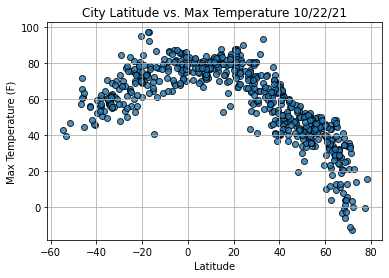

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

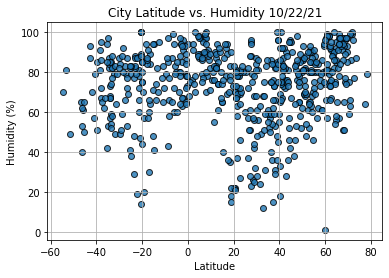

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

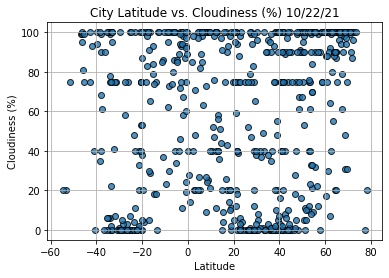

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

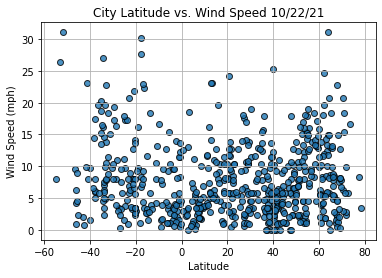

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [21]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [22]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

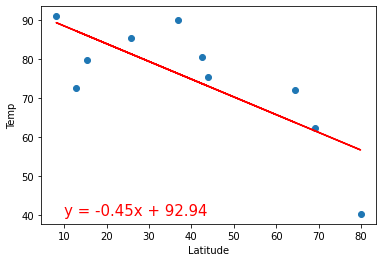

In [23]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

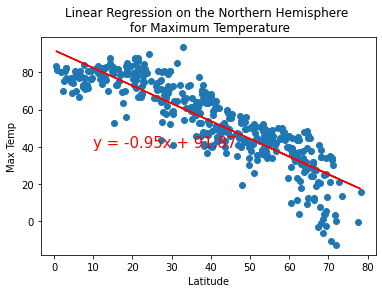

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

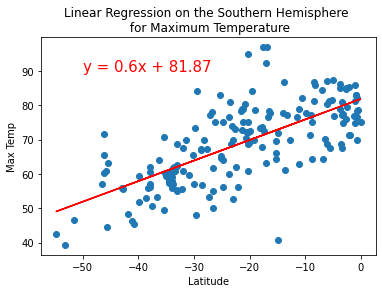

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

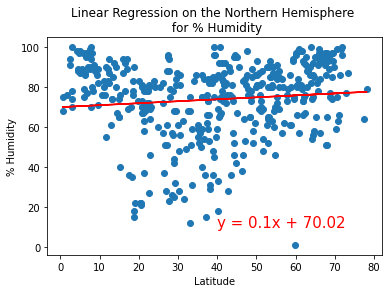

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

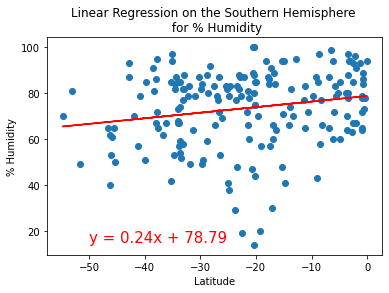

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

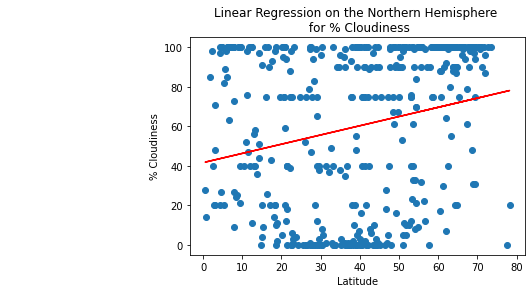

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

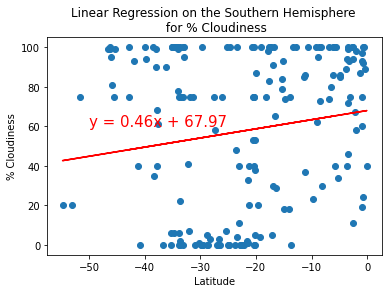

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

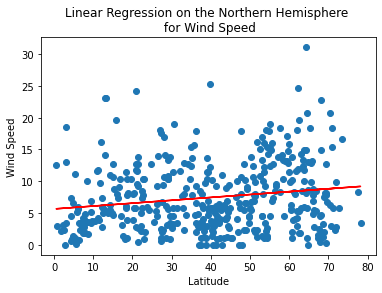

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

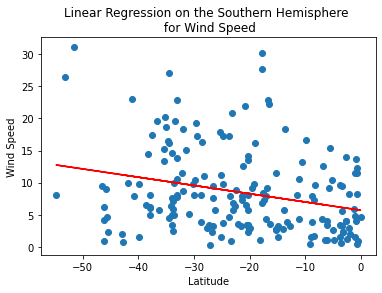

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))